In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
import os
import cv2

path = '/Users/prabup/Desktop/Datasets/archive (1)/Training'
classes = {'no_tumor': 0, 'pituitary_tumor': 1}
X = []
Y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
pd.Series(Y).value_counts()

1    827
0    395
Name: count, dtype: int64

In [7]:
X_updated = X.reshape(len(X), -1)

In [8]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

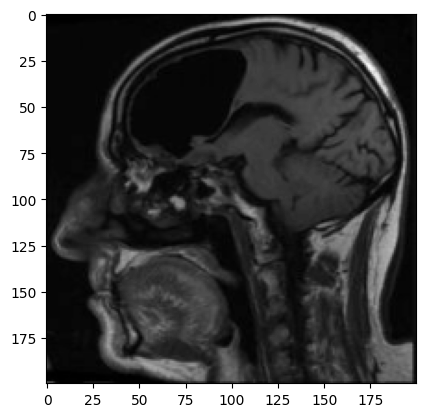

In [9]:
plt.imshow(X[0], cmap='gray')

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [12]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

In [14]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

1.0 0.0
1.0 0.0
0.00392156862745098 0.0
0.00392156862745098 0.0


In [15]:
from sklearn.svm import SVC

In [16]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [17]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9948822927328557
Testing Score: 0.9591836734693877


In [18]:
pred = sv.predict(xtest)

In [19]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 12,  28,  33, 106, 129, 162, 171, 172, 202, 210]),)

In [20]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

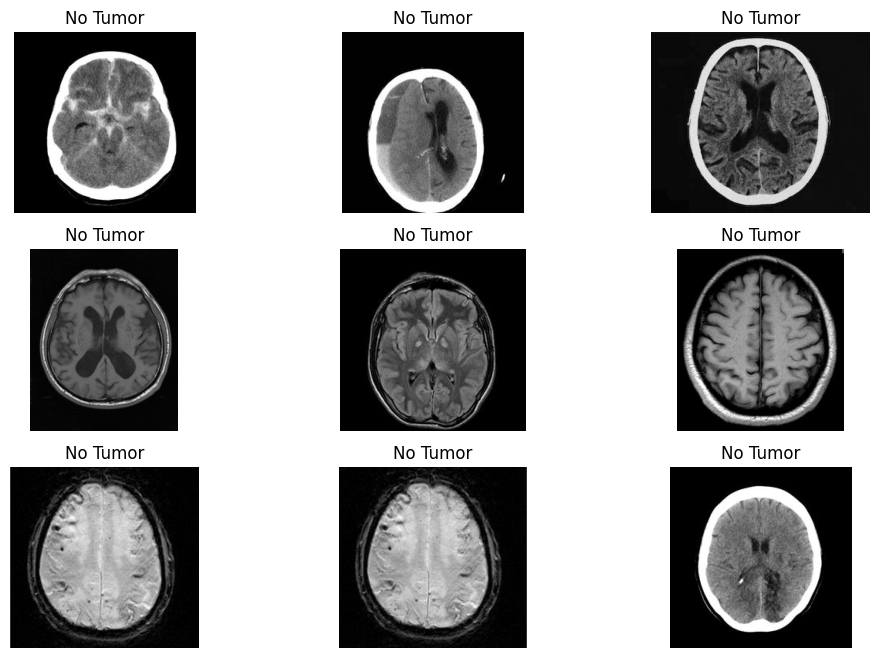

In [21]:
plt.figure(figsize=(12,8))
c=1
path='/Users/prabup/Desktop/Datasets/archive (1)/Testing/no_tumor'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'Unknown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

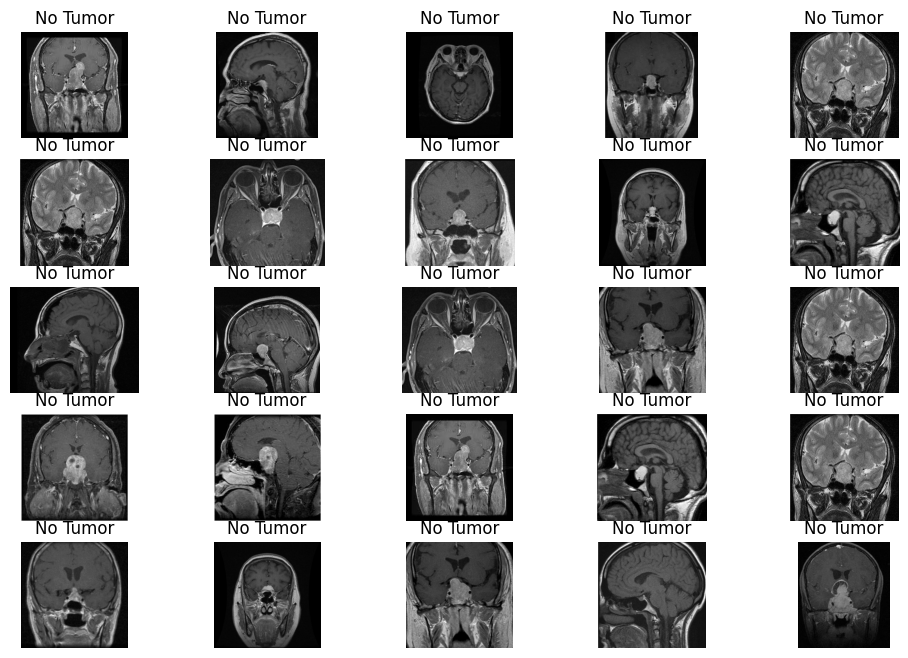

In [26]:
plt.figure(figsize=(12,8))
c=1
path='/Users/prabup/Desktop/Datasets/archive (1)/Testing/pituitary_tumor'
for i in os.listdir(path)[:25]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(5,5,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1;
  else:
    print(f"Failed to Load Image:{i}")
    plt.show()